In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from img_manager import load_data

In [3]:
IMG_SIZE = 50
BATCH_SIZE = 32

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Uploaded 1000 photos
Uploaded 2000 photos
Uploaded 3000 photos
Uploaded 4000 photos
Uploaded 5000 photos
Uploaded 6000 photos
Uploaded 7000 photos
Uploaded 8000 photos
Uploaded 9000 photos
Uploaded 10000 photos
siema1
siema2
siema3
siema4
siema5
siema1
siema2
siema3
siema4
siema5
(10592, 50, 50, 3)
(10592,)
(212, 50, 50, 3)
(212,)


In [5]:
model = keras.models.Sequential(
    [
        keras.Input(shape=(IMG_SIZE,IMG_SIZE,3)),
        layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer = regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer = regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Conv2D(256, (3,3), activation='relu', kernel_regularizer = regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(1, activation='sigmoid')
    ]
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 22, 22, 128)       512       
 chNormalization)                                                
                                                        

In [7]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

In [8]:
model_fit = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs = 5)

Epoch 1/5
331/331 [==============================] - 79s 234ms/step - loss: 1.1935 - accuracy: 0.9575
Epoch 2/5
331/331 [==============================] - 77s 234ms/step - loss: 0.2746 - accuracy: 0.9762
Epoch 3/5
331/331 [==============================] - 81s 245ms/step - loss: 0.1903 - accuracy: 0.9807
Epoch 4/5
331/331 [==============================] - 84s 253ms/step - loss: 0.1929 - accuracy: 0.9776
Epoch 5/5
331/331 [==============================] - 92s 276ms/step - loss: 0.1798 - accuracy: 0.9822


In [9]:
model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

7/7 [==============================] - 1s 63ms/step - loss: 0.3632 - accuracy: 0.9292


[0.363240510225296, 0.9292452931404114]

In [12]:
model.save('model/face_reco_new.h5')

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

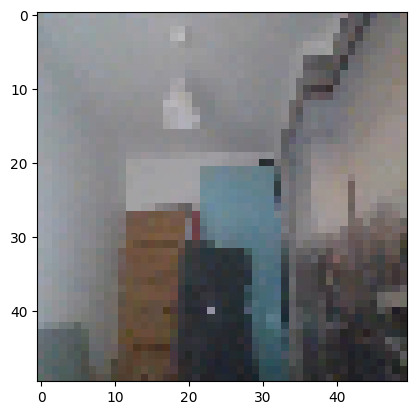

1/1 [==============================] - 0s 18ms/step
Human


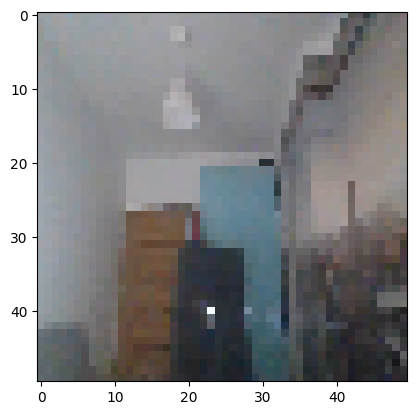

1/1 [==============================] - 0s 18ms/step
Human


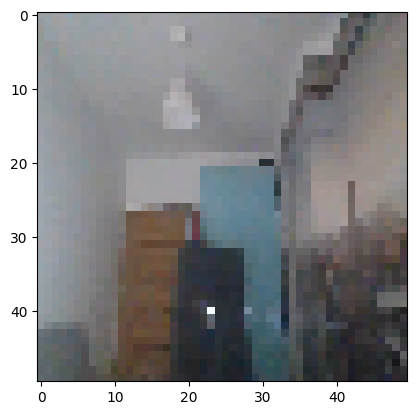

1/1 [==============================] - 0s 18ms/step
Human


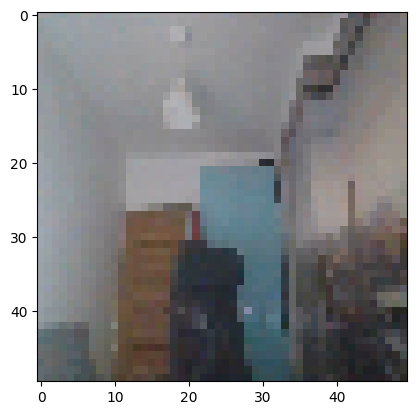

1/1 [==============================] - 0s 25ms/step
Human


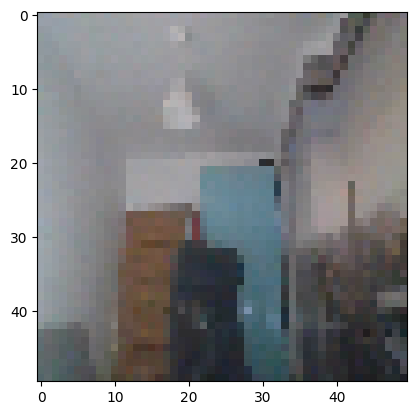

1/1 [==============================] - 0s 31ms/step
Human


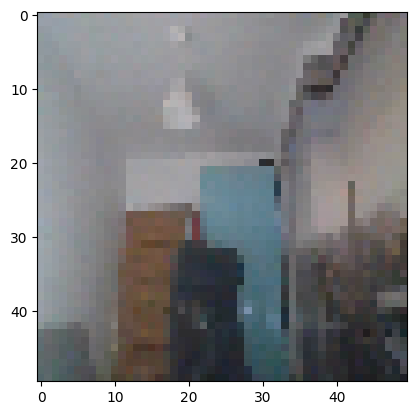

1/1 [==============================] - 0s 21ms/step
Human


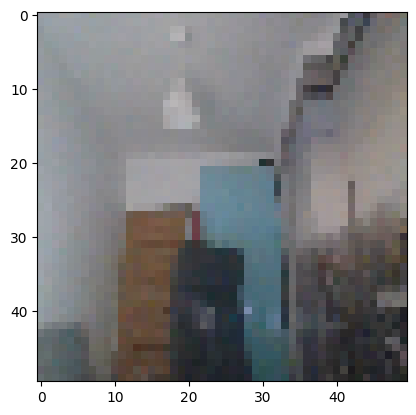

1/1 [==============================] - 0s 21ms/step
Human


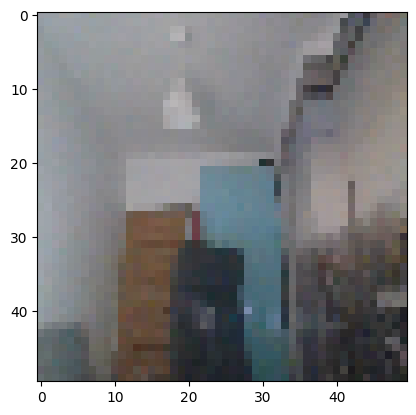

1/1 [==============================] - 0s 18ms/step
Human


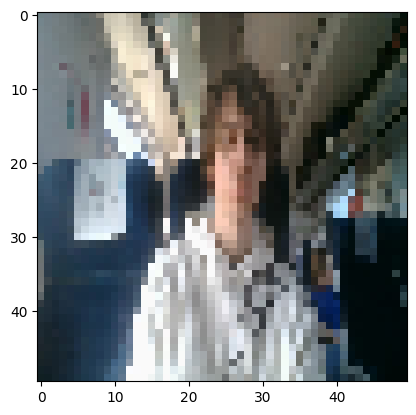

1/1 [==============================] - 0s 16ms/step
Human


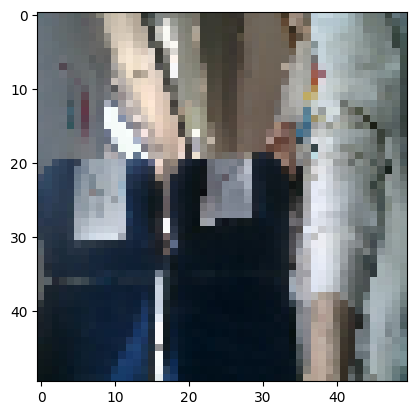

1/1 [==============================] - 0s 20ms/step
Human


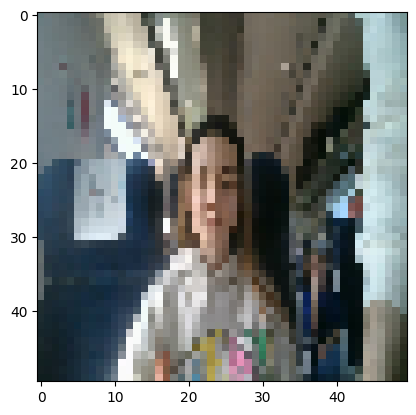

1/1 [==============================] - 0s 18ms/step
Human


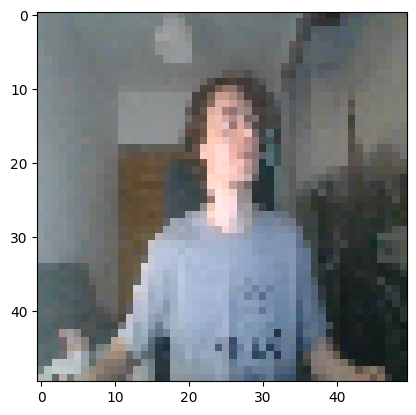

1/1 [==============================] - 0s 20ms/step
Human


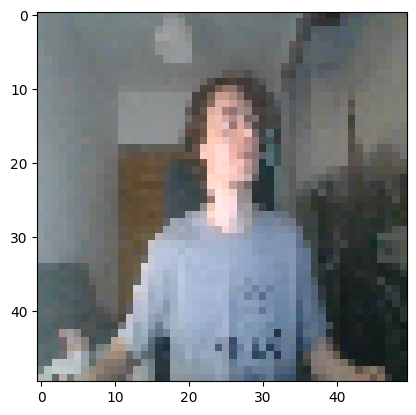

1/1 [==============================] - 0s 18ms/step
Human


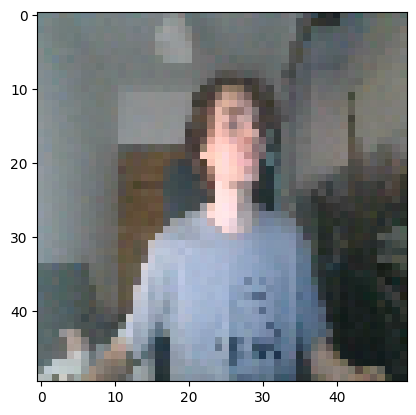

1/1 [==============================] - 0s 18ms/step
Human


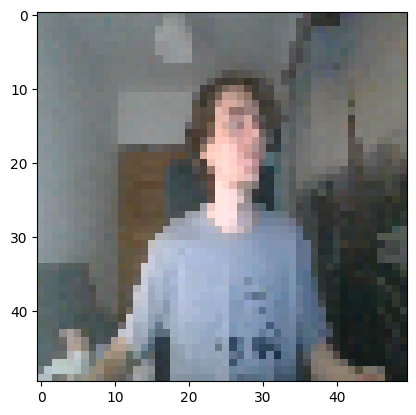

1/1 [==============================] - 0s 18ms/step
Human


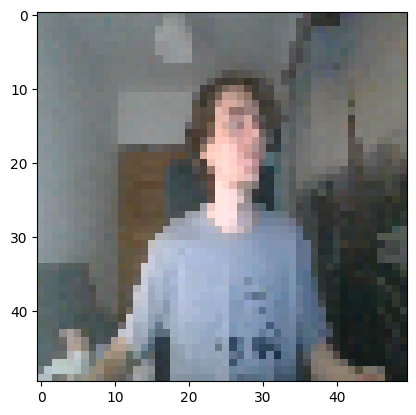

1/1 [==============================] - 0s 20ms/step
Human


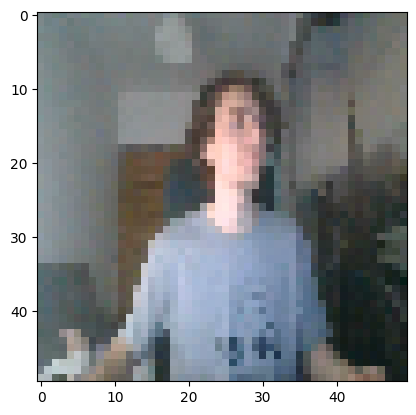

1/1 [==============================] - 0s 20ms/step
Human


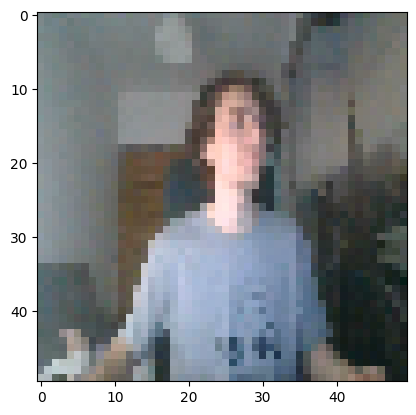

1/1 [==============================] - 0s 19ms/step
Human


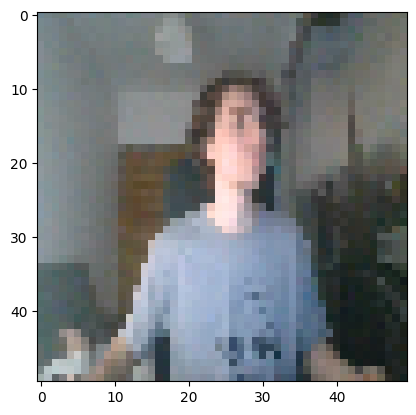

1/1 [==============================] - 0s 20ms/step
Human


In [15]:
dir = 'img/test/'

i=0
for file in os.listdir(dir):
        path = dir+file
        img = image.load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
        plt.imshow(img)
        plt.show()

        X = image.img_to_array(img)
        X = np.expand_dims(X, axis = 0)
        images = np.vstack([X])
        label = model.predict(images)

        if label == 0:
                print("Not Human")
        elif label == 1:
                print("Human")